# Data Summary and Businesss Problem

# Model Prep

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.set_option('display.max_columns', None)

In [14]:
#Load in the data and store it as ride

ride = pd.read_csv('../../02_project/data/rideshare_subset.csv')
ride = ride.dropna()
ride.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,4.577000e+03,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4.577000e+03,4577.000000,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4.577000e+03,4.577000e+03,4577.000000,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03
mean,1.544055e+09,11.725803,17.716627,11.592528,16.577671,2.218396,1.014475,42.338177,-71.065831,39.674381,36.018999,0.008880,0.143094,0.739600,6.137035,8.420939,1.544058e+09,8.534505,45.110201,1.544058e+09,34.220793,1.544110e+09,41.714448,1.544058e+09,30.225598,1.544107e+09,31.694706,1010.335722,219.689753,0.680542,0.248634,8.534505,312.942277,1.544035e+09,1.544069e+09,0.574903,0.037227,1.544052e+09,33.445040,1.544050e+09,45.325078,1.544056e+09,29.743240,1.544056e+09,42.088986,1.544056e+09
std,6.892093e+05,6.960787,9.947628,0.491418,9.070030,1.132395,0.097195,0.048034,0.020318,6.851340,8.065333,0.027257,0.324053,0.137669,3.152868,5.310053,6.936693e+05,2.527096,6.036917,6.936789e+05,6.315467,6.920019e+05,7.700090,6.940228e+05,7.923045,6.925180e+05,9.205721,13.504567,97.808975,0.362728,0.476514,2.527096,27.673767,6.910567e+05,6.905803e+05,0.246494,0.055250,6.911293e+05,6.539092,6.902815e+05,5.691830,6.901182e+05,7.148098,6.875209e+05,6.982644,6.909731e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.030000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.860000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543445e+09,6.000000,13.000000,11.000000,9.500000,1.340000,1.000000,42.350300,-71.081000,36.270000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.540000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.430000,999.890000,129.000000,0.350000,0.000000,8.540000,290.600000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,28.900000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543746e+09,12.000000,17.000000,12.000000,14.000000,2.210000,1.000000,42.351900,-71.063100,40.680000,36.010000,0.000000,0.000000,0.710000,5.680000,7.330000,1.543756e+09,9.876000,44.680000,1.543788e+09,34.180000,1.543817e+09,41.380000,1.543788e+09,30.030000,1.543817e+09,30.890000,1009.850000,256.000000,0.820000,0.000000,9.876000,305.500000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543748e+09,41.380000,1.543788e+09
75%,1.544831e+09,18.000000,28.000000,12.000000,22.500000,2.960000,1.000000,42.364700,-71.054200,43.610000,40.720000,0.000000,0.000000,0.880000,8.390000,11.740000,1.544846e+09,9.996000,47.060000,1.544814e+09,38.880000,1.544836e+09,44.120000,1.544818e+09,35.320000,1.544836e+09,38.560000,1021.940000,303.000000,1.000000,

In [27]:
#There is a lot of columns that we really do not need so we will trim downn the dataset 
columns_to_keep = ['price', 'hour','day', 'month', 'distance', 'surge_multiplier', 'name']

ride = ride[columns_to_keep]
ride.head()

,price,hour,day,month,distance,surge_multiplier,name
0,11.0,14,14,12,3.07,1.00,Lyft
1,8.0,13,27,11,1.89,1.00,UberPool
2,11.0,0,27,11,1.74,1.25,Lyft
3,14.0,21,1,12,1.50,1.00,UberXL
4,22.5,21,26,11,3.21,1.00,Lux


In [28]:
#get the dummies for categorical data

ride_dummies = pd.get_dummies(data = ride, drop_first= True, dtype= int)
ride_dummies.columns

Index(['price', 'hour', 'day', 'month', 'distance', 'surge_multiplier',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

### Refference Columns
- Name_Black

# EDA

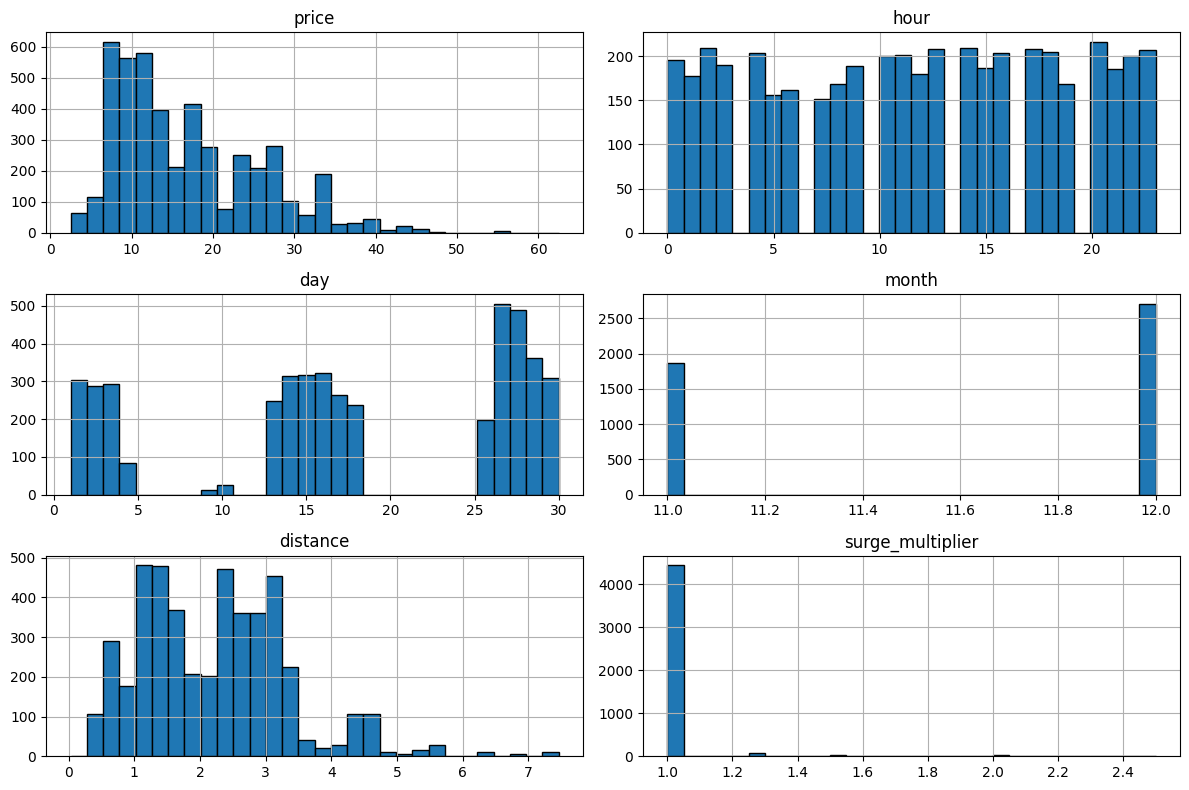

In [29]:
# Create histograms for each numerical column
ride.hist(figsize=(12, 8), bins=30, edgecolor='black')

plt.tight_layout() 
plt.show()

- This is interesting to see that we only have data for november and december. This is deffinetly something that we will have to take into account and possibly use it as a model to price rideshares during the holidays (Thanksgiving and December).

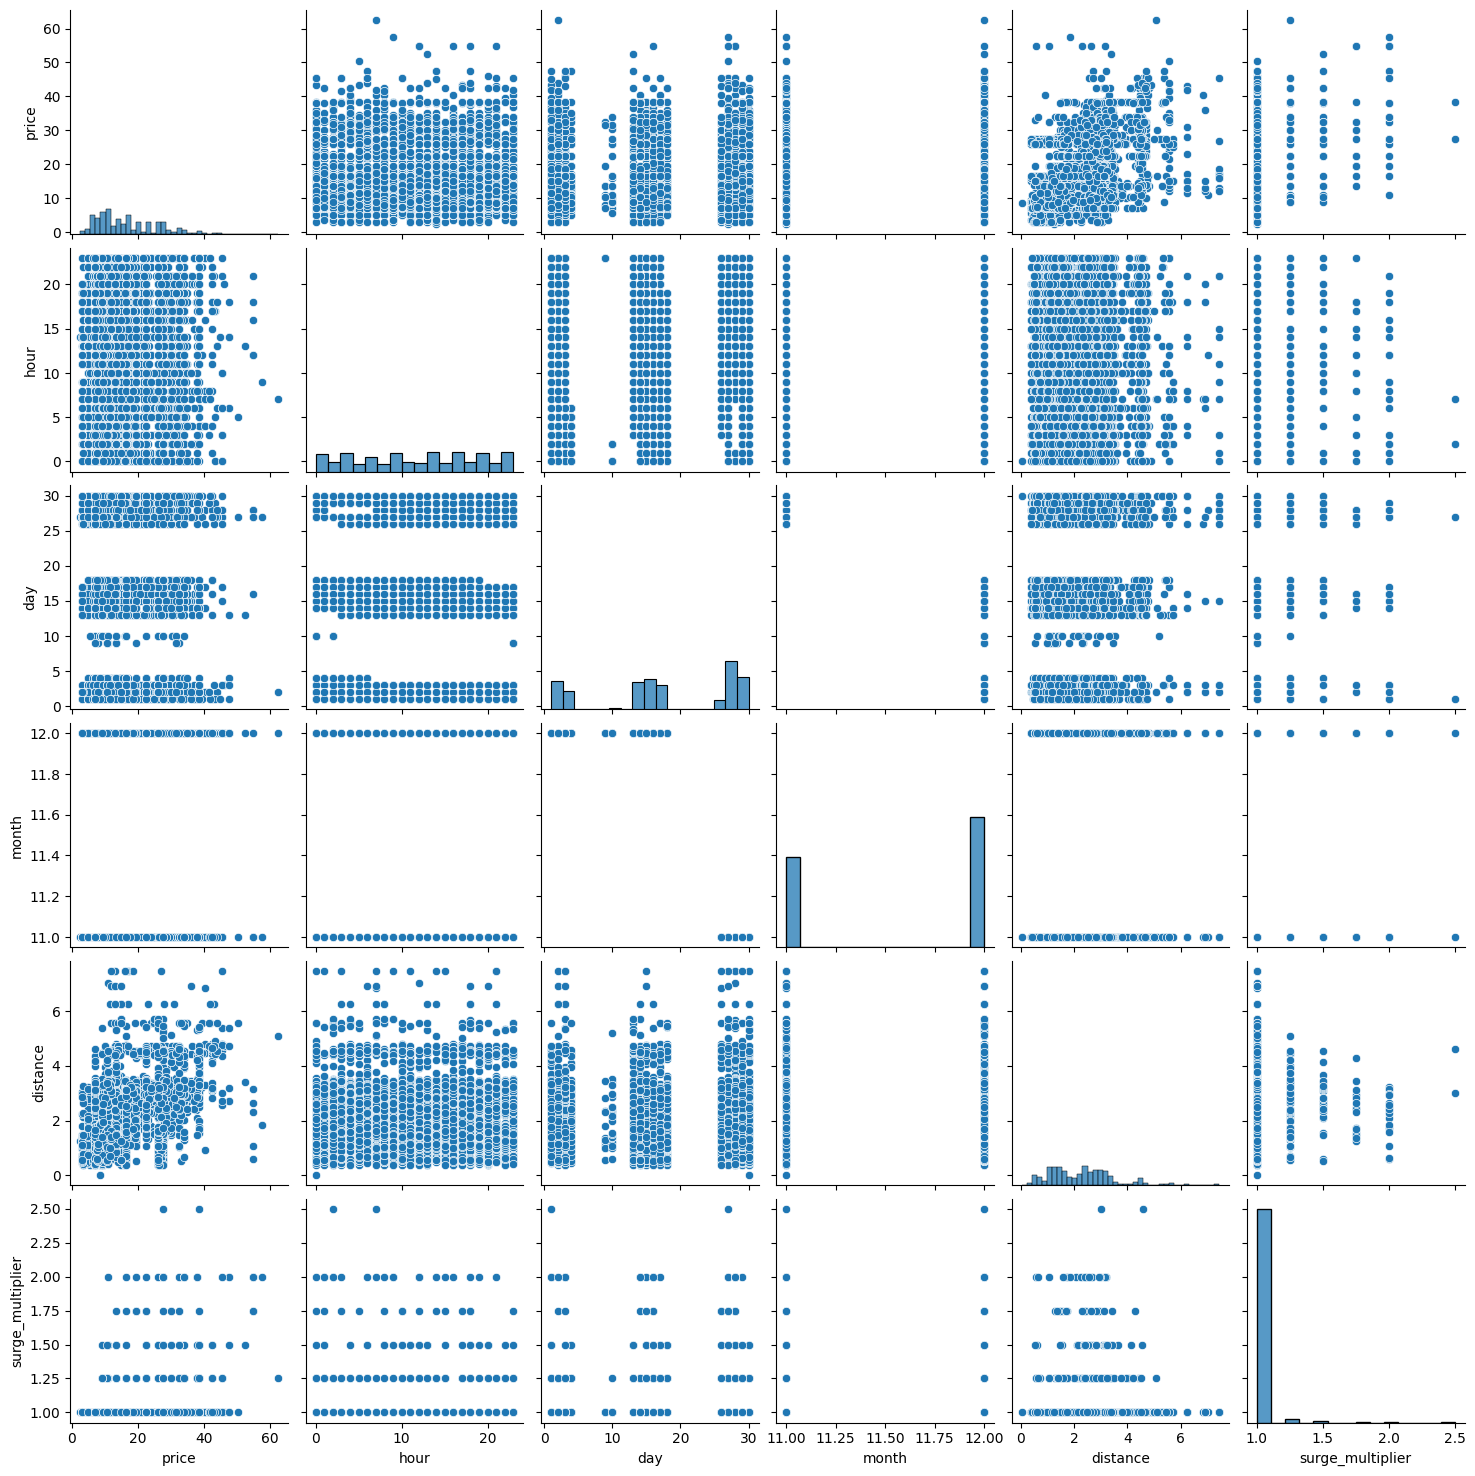

In [18]:
sns.pairplot(ride)

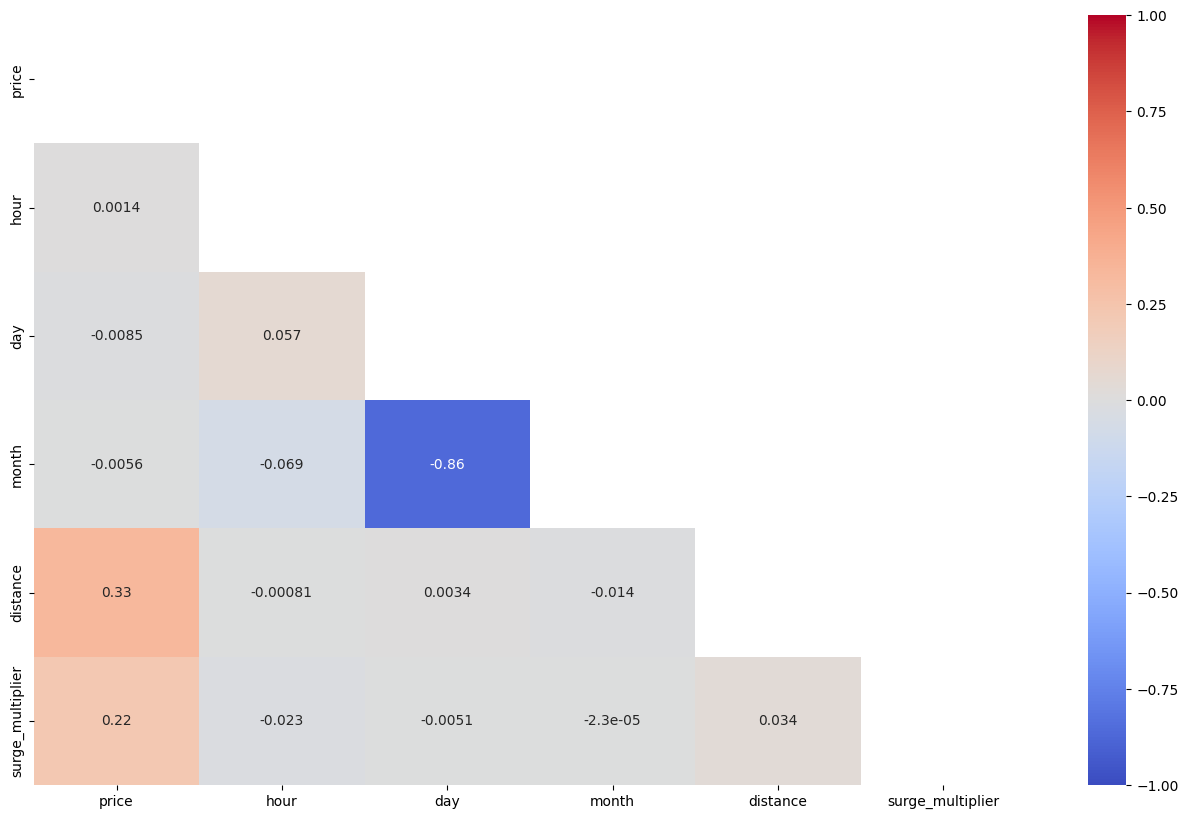

In [33]:
# Compute correlation matrix once
corr_matrix = ride.select_dtypes(include=['number']).corr()


# Set figure size before plotting
plt.figure(figsize=(16, 10))

# Create heatmap
sns.heatmap(corr_matrix, 
            cmap='coolwarm',  # Color palette
            annot=True,  # Show correlation values
            vmin=-1, vmax=1,  # Normalize color scale
            mask=np.triu(corr_matrix))  # Hide upper triangle

plt.show()

# Baseline Model

# Regularization and Variable Selection

# Rerun the Model With Best Variables Selected

- List the variables selected

In [ ]:
#Create a new subset dataframe with the best vars chosen

In [ ]:
#re-fit the model with the selected vars

## Assumptions

### Insert all assumptions here below

## Applying Transformations for unmet assumptions

In [ ]:
#transformations

## Check interactions and apply them if needed

In [ ]:
#interactions

# Model Assesments

## $R^2$

## F-Test

## RMSE

## MAE

# Statistical inference

### hypothesis tests for all slopes

In [ ]:
#hypothesis tests

 - you can group these together as "significant" or "not" in your interpretation

### confidence intervals for all slopes

- take extra care in providing accurate interpretations if your model includes an interaction term

### confidence interval for the mean of  $ Y $


- you cannot plot this, so pick specific values for the predictors to use and then interpret

### prediction interval for an individual observation

- you cannot plot this, so pick specific values for the predictors to use and then interpret

# Summary and Next Steps